### This script loops over a data ensemble of netCDF files and creates a histogram of all input data 

In [24]:
import numpy as np 
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [25]:
def read_in_netcdf(file):
    dataset = Dataset(file)    
    precip= np.array(dataset["precipitationCal"])
    dataset.close()
    return precip

In [83]:
#  plot histogram based on bins and heights (output from np.histogram)

def plot_histogram(heights,bins):
    a= np.sum(heights)
    plt.style.use('seaborn')
    plt.rcParams.update({'font.size': 35,
                 'xtick.labelsize' : 35,
                 'ytick.labelsize' : 35})
    plt.figure(figsize=(17, 10))

    plt.bar(bins[:-1], (heights/a)*100, width = 1.0, color= 'k')
    plt.ylabel('Frequency (%)', fontsize= 35)
    plt.xlabel('Rain rates (mm/hr)', fontsize= 35)
    plt.xlim(0,30)
    plt.savefig('/media/juli/Elements/comparison/histogram_gpm_rainrates_2014-2018_zoom.pdf')

In [44]:
file = '/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/high_resolution/3B-HHR.MS.MRG.3IMERG.20160509-S150000-E152959.0900.V05B.HDF5.nc4'
precip = read_in_netcdf(file)
file_list= glob.glob('/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/high_resolution/3B-HHR*.nc4')  

In [69]:
# loop through all files in directory which correspond to wildcard
nbins = 100
heights = np.zeros((nbins,))
i = 0 
for file in file_list:
    precip= read_in_netcdf(file)
    h, b   = np.histogram(precip[precip > 0.1], bins = nbins)
    bins = b
    heights += h
    i += 1
    if i % 1000 == 0:
        print(i)
    

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000


In [53]:
print(bins, heights)

[ 0.10048431  2.31622841  4.53197251  6.74771661  8.96346071 11.17920481
 13.39494891 15.61069301 17.82643711 20.04218121 22.25792531 24.47366941
 26.68941351 28.90515761 31.12090171 33.33664581 35.55238991 37.76813401
 39.98387811 42.19962221 44.41536631 46.63111041 48.84685451 51.06259861
 53.27834271 55.49408681 57.70983091 59.92557501 62.14131911 64.35706321
 66.57280731] [1.15560552e+08 2.94726880e+07 1.33998030e+07 7.36421300e+06
 4.49923200e+06 2.95086000e+06 2.04424800e+06 1.46360000e+06
 1.07805500e+06 8.15564000e+05 6.28675000e+05 4.95607000e+05
 3.93773000e+05 3.18293000e+05 2.59667000e+05 2.13550000e+05
 1.77617000e+05 1.48640000e+05 1.25566000e+05 1.06865000e+05
 9.11710000e+04 7.86300000e+04 6.78570000e+04 5.95410000e+04
 5.15720000e+04 4.52970000e+04 4.07560000e+04 3.57060000e+04
 3.19080000e+04 1.02925000e+05]


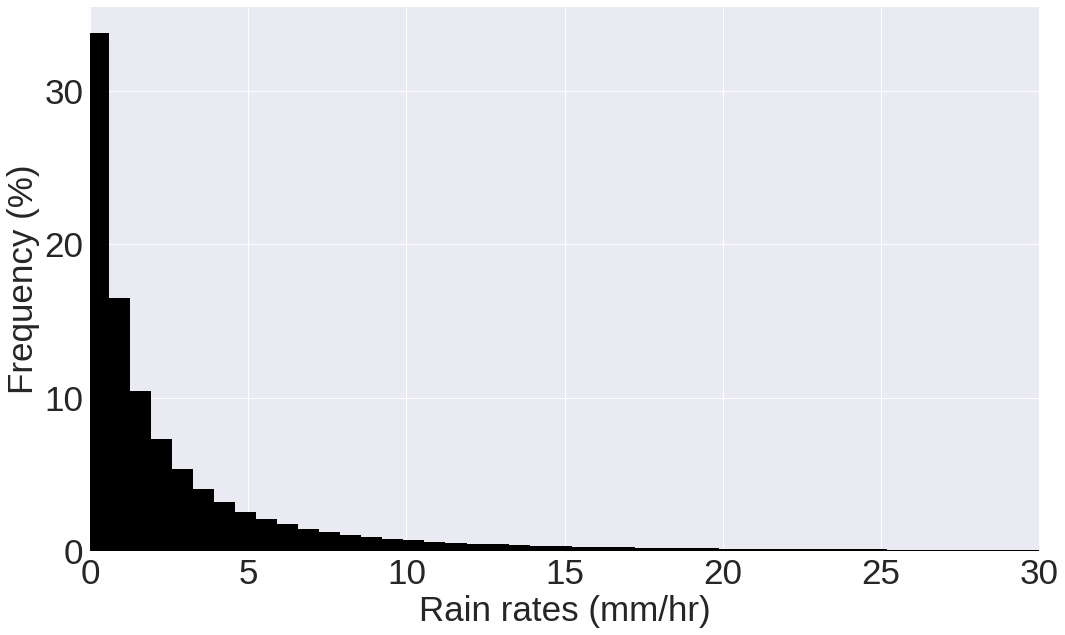

In [84]:
# final plot
plot_histogram(heights,bins)
